# Исследование надежности заемщиков.

**Цель исследования** — проверить гипотезы:

1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Влияет ли уровень дохода на факт погашения кредита в срок.
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

Данные о клиентах получены из файла `data.csv`. 
О качестве данных ничего не известно. Поэтому перед проверкой гипотез необходим обзор данных, 
проверка данных на ошибки и оценка их влияния на исследование, 
исправление критичных ошибок данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/datasets/data.csv')
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


В таблице 12 столбцов. Тип данных во всех столбцах — `object`, `int64`, `float64`

Согласно документации к данным:

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
*  `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

### Шаг 2.1 Заполнение пропусков

В  столбцах `days_employed` и `total_income` есть пропущенные значения. 


In [2]:
print(df['days_employed'].isna().sum())
print(df['total_income'].isna().sum())
print('{:.0%}'.format(df['total_income'].isna().sum()/df.shape[0]))

display(df[df['total_income'].isna() == True].head(10))

2174
2174
10%


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


В столбцах пропущено 2174 значения, что составляет 10% от списка.
Возможно пропущены значения из-за не предоставления данных клиентами или из-за отсутствия их подтверждения. 
Возможно речь о случаях, когда не требуются данные о доходах и месте работы,  
например если клиент является зарплатным.
Заполним пропуски  медианным значением по столбцам.
Заполнить пропуски медианным значением —
лучшее решение для количественных переменных, так как могут присутсвовать значения сильно выделяющиеся среди большинства.



<br> Ещё можно посмотреть долю пропущенных значений среди всех данных следующим способом
    
    df.isna().mean()
</div>

In [3]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(df['total_income'].median())


 Также здесь можно заполнить пропуски более оптимальным способом - медианой, в зависимости от типа занятости. Для этого отлично подойдёт функция transform:

    df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform("median"))

Она создаёт новый столбец, который содержит столько же строк, сколько и изначальный, но только вместо оригинальных значений в каждой строке содержится медиана посчитанная по заданной группе. После этого вместо пропусков в оригинальном столбце мы подставляем значения из созданного столбца, то есть медианы в зависимости от группы.


### Шаг 2.2 Проверка данных на аномалии и исправления.

Проверим уникальные значения в категориальных столбцах `purpose`, `children`, `family_status`,	`family_status_id`, `debt`.


In [4]:
print(df['children'].sort_values().unique())
print(df['purpose'].sort_values().unique())
print(df['family_status'].unique())
print(df['family_status_id'].unique())
print(df['debt'].unique())

[-1  0  1  2  3  4  5 20]
['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции с недвижимостью'
 'операции со своей недвижимостью' 'покупка жилой недвижимости'
 'покупка жилья' 'покупка жилья для сдачи' 'покупка жилья для семьи'
 'покупка коммерческой недвижимости' 'покупка недвижимости'
 'покупка своего жилья' 'получение высшего образования'
 'получение дополнительного образования' 'получение образования'
 'приобретение автомобиля' 'профильное образование' 'ремонт жилью'
 'свадьба' 'свой автомобиль' 'сделка с автомобилем'
 'сделка с подержанным автомобилем' 'строительство жилой недвижимости'
 'строительство недвижимости' 'строительство собственной недвижимости'
 'сыграть свадьбу']
['

Посчитаем количество аномальных значений в столбце `children` со значением 20 

In [5]:
print(df[df['children'] == 20]['children'].count())

76


1. Отрицательное количество дней трудового стажа в столбце `days_employed` является аномалией. 
Возможно данная аномалия появилась из-за ошибок в заполнении форм, втом числе при вычислении стажа 
путем вычитания дат начала и конца трудового стажа, при перемене конца и начала. 

2. Аномалия в столбце `children` - отрицательное значение количества детей. 
Данная аномалия возникла из-за ручного ввода данных

3. Аномальное количество детей - `20`   в 76 случаях. 
Данная аномалия возникла из-за ручного ввода данных.
.
4. В столбце `education` используются разные регистры. Данная ситуация возникла из-за ручного ввода данных.

5. Повторяющиеся цели кредитов ( не явные дубликаты) в столбце `purpose`. Не будем исправлять на данном этапе, распределим на этапе категоризации целей кредита. 

Обработаем значения в столбцах:
1. Заменим отрицательные значения в столбце `days_employed`  и `children`
2. Изменим регистров столбце `education`
3. Заменим в столбце  `children` значение 20 на 2, исходя из предположения ошибки ввода (лишний 0)


In [6]:
def positive_data(days_employed):
    if days_employed < 0:
        return days_employed*(-1)
    return days_employed

df['days_employed'] = df['days_employed'].apply(positive_data)
df['children'] = df['children'].apply(positive_data)

df['education'] = df['education'].str.lower()
df['children'] = df['children'].replace(20,2)


### Шаг 2.3. Изменение типов данных.

Учитываем только целую часть  в столбце `days_employed` и столбце `total_income`, т.е. изменим на данные на тип Int

In [7]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.4. Удаление дубликатов.

Найдем и удалим дубликаты

In [8]:
print(df.duplicated().sum())

71


In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null int64
days_employed       21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null int64
purpose             21454 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два новых датафрейма со столбцами:
education_id и education — в первом;
family_status_id и family_status — во втором.
Удалим из исходного датафрейма столбцы education и family_status, 
оставив только их идентификаторы

In [10]:
df_education = pd.DataFrame(columns=['education_id', 'education'] )
df_education['education_id'] = df['education_id'].unique()
df_education['education'] = df['education'].unique()
display(df_education)

df_family_status = pd.DataFrame(columns=['family_status_id', 'family_status'] )
df_family_status['family_status_id'] = df['family_status_id'].unique()
df_family_status['family_status'] = df['family_status'].unique()
display(df_family_status)



,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


удалим education family_status

In [11]:
df = df.drop(columns=['family_status', 'education'])
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

Создадим категории по доходам за месяц по условию:
* `0–30000` — `'E'`;
* `30001–50000` — `'D'`;
* `50001–200000` — `'C'`;
* `200001–1000000` — `'B'`;
* `1000001 и выше` — `'A'`.



In [1]:
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    if total_income <= 50000:
        return 'D'
    if total_income <= 200000:
        return 'C'
    if total_income <= 1000000:
        return 'B'
    return 'A'

df['total_income_category'] = df.apply(total_income_category)
display(df.head(10))

df_income_category = pd.DataFrame(columns=['total_income_category', 'total_income'] )
df_income_category['total_income_category'] = df['total_income_category'].sort_values(ascending=False).unique()
df_income_category['total_income'] = ['0–30000','30001–50000','50001–200000','200001–1000000','1000001 и выше']
display(df_income_category)


NameError: name 'df' is not defined

### Шаг 2.7. Категоризация целей кредита.

Создадим 4 категории получения кредита:
1. `операции с автомобилем`
2. `операции с недвижимостью`
3. `проведение свадьбы`
4. `получение образования`

Распределим все уникальные значении по указанным четырем категориям. 


In [13]:
def purpose_category(purpose):
    if purpose in ['автомобили','автомобиль', 'на покупку автомобиля', 
'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'приобретение автомобиля', 
 'свой автомобиль', 'сделка с автомобилем', 'сделка с подержанным автомобилем']:
        return 'операции с автомобилем'
    if purpose in ['жилье', 'недвижимость', 'операции с жильем', 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',  'операции со своей недвижимостью', 'покупка жилой недвижимости',
 'покупка жилья', 'покупка жилья для сдачи', 'покупка жилья для семьи',
 'покупка коммерческой недвижимости', 'покупка недвижимости',
 'покупка своего жилья', 'ремонт жилью', 'строительство жилой недвижимости',
 'строительство недвижимости', 'строительство собственной недвижимости']:
        return 'операции с недвижимостью'
    if purpose in ['проведение свадьбы', 'на проведение свадьбы', 'свадьба', 'сыграть свадьбу']:
        return 'проведение свадьбы'
    if purpose in ['высшее образование', 'дополнительное образование',  'заняться высшим образованием', 
'заняться образованием',  'образование', 'получение высшего образования',
 'получение дополнительного образования', 'получение образования', 'профильное образование' ]:
        return 'получение образования'
    

df['purpose_category'] = df['purpose'].apply(purpose_category)
display(df.head(10))


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Тут можно упростить функцию и сделать следующим образом
    
    if  'авто' in purpose:
        return 'операции с автомобилем'
    elif 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образо' in purpose:
        return 'получение образования'


Посчитаем количество кредитов по категориям и количество фактов задолженности по возврату кредитов, затем найдем процент кредитов с задолженностями к общему числу в категории.
1. По семейному статусу
2. По количеству детей 
3. По категории дохода
4. По целям кредита 



In [14]:
df_pivot_family_status_sum = df.pivot_table(index = [ 'family_status_id'],  values = 'debt', aggfunc = sum)
display(df_pivot_family_status_sum.merge(df_family_status, on = 'family_status_id',how='right' ))

df_pivot_family_status_len = df.pivot_table(index = [ 'family_status_id'],  values = 'debt', aggfunc = len)
display(df_pivot_family_status_len.merge(df_family_status, on = 'family_status_id',how='right' ))

def print_head():
    print('')
    print('Задолженность по кредитам, %')
    print('______________________________')

print_head()
persent_family_status = (100*df_pivot_family_status_sum/df_pivot_family_status_len).sort_values(by = 'debt', ascending=False)
display(persent_family_status.round(2).merge(df_family_status, on = 'family_status_id',how='right' ))


,family_status_id,debt,family_status
0,0,931,женат / замужем
1,1,388,гражданский брак
2,2,63,вдовец / вдова
3,3,85,в разводе
4,4,274,Не женат / не замужем


,family_status_id,debt,family_status
0,0,12339,женат / замужем
1,1,4151,гражданский брак
2,2,959,вдовец / вдова
3,3,1195,в разводе
4,4,2810,Не женат / не замужем



Задолженность по кредитам, %
______________________________


,family_status_id,debt,family_status
0,4,9.75,Не женат / не замужем
1,1,9.35,гражданский брак
2,0,7.55,женат / замужем
3,3,7.11,в разводе
4,2,6.57,вдовец / вдова


In [15]:
df_pivot_children_sum = df.pivot_table(index = ['children'],  values = 'debt', aggfunc = sum)
display(df_pivot_children_sum)


df_pivot_children_len = df.pivot_table(index = ['children'],  values = 'debt', aggfunc = len)
display(df_pivot_children_len)
print_head()
display((100*df_pivot_children_sum/df_pivot_children_len).sort_values(by = 'debt', ascending=False).round(2))


,debt
children,
0,1063
1,445
2,202
3,27
4,4
5,0


,debt
children,
0,14091
1,4855
2,2128
3,330
4,41
5,9



Задолженность по кредитам, %
______________________________


,debt
children,
4,9.76
2,9.49
1,9.17
3,8.18
0,7.54
5,0.00


In [16]:
df_pivot_income_category_sum = df.pivot_table(index = [ 'total_income_category'],  values = 'debt', aggfunc = sum)
display(df_pivot_income_category_sum)

df_pivot_income_category_len = df.pivot_table(index = [ 'total_income_category'],  values = 'debt', aggfunc = len)
display(df_pivot_income_category_len)

print_head() 
percent_income_category = (100*df_pivot_income_category_sum/df_pivot_income_category_len).sort_values(by = 'debt', ascending=False)
display(percent_income_category.round(2).merge(df_income_category, on = 'total_income_category' ,how='right' ))

,debt
total_income_category,
A,2
B,356
C,1360
D,21
E,2


,debt
total_income_category,
A,25
B,5041
C,16016
D,350
E,22



Задолженность по кредитам, %
______________________________


,total_income_category,debt,total_income
0,E,9.09,0–30000
1,C,8.49,50001–200000
2,A,8.00,1000001 и выше
3,B,7.06,200001–1000000
4,D,6.00,30001–50000


In [17]:
df_pivot_purpose_sum = df.pivot_table(index = [ 'purpose_category'],  values = 'debt', aggfunc = sum)
display(df_pivot_purpose_sum)

df_pivot_purpose_len = df.pivot_table(index = [ 'purpose_category'],  values = 'debt', aggfunc = len)
display(df_pivot_purpose_len)
print_head()

display((100*df_pivot_purpose_sum/df_pivot_purpose_len).sort_values(by = 'debt', ascending=False).round(2))


,debt
purpose_category,
операции с автомобилем,403
операции с недвижимостью,782
получение образования,370
проведение свадьбы,186


,debt
purpose_category,
операции с автомобилем,4306
операции с недвижимостью,10811
получение образования,4013
проведение свадьбы,2324



Задолженность по кредитам, %
______________________________


,debt
purpose_category,
операции с автомобилем,9.36
получение образования,9.22
проведение свадьбы,8.00
операции с недвижимостью,7.23


Дополнительно рассмотрим двумерные зависимости 
1. От уровня дохода и целей кредита
2. От семейного положения и количества детей 

In [18]:
df_pivot_family_status_children_sum = df.pivot_table(index = [ 'family_status_id'], 
columns = ['children'],values = 'debt', aggfunc = sum)
df_pivot_family_status_children_len = df.pivot_table(index = [ 'family_status_id'],  
columns = ['children'],values = 'debt', aggfunc = len)

df_pivot_income_category_purpose_sum = df.pivot_table(index = [ 'purpose_category'],  
columns = ['total_income_category'],values = 'debt', aggfunc=sum)
df_pivot_income_category_purpose_len = df.pivot_table(index = [ 'purpose_category'],
columns = ['total_income_category'],values = 'debt', aggfunc=len)



display(df_pivot_income_category_purpose_sum)
display(df_pivot_income_category_purpose_len)
display((df_pivot_income_category_purpose_sum/df_pivot_income_category_purpose_len).round(2))

display(df_pivot_family_status_children_sum.merge(df_family_status, on = 'family_status_id',how='right'))
display(df_pivot_family_status_children_len.merge(df_family_status, on = 'family_status_id',how='right'))
display((df_pivot_family_status_children_sum/df_pivot_family_status_children_len).round(2).merge(df_family_status, on = 'family_status_id',how='right' ))

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0,86,307,10,0
операции с недвижимостью,1,172,601,6,2
получение образования,1,70,297,2,0
проведение свадьбы,0,28,155,3,0


total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,2,1031,3199,72,2
операции с недвижимостью,17,2568,8047,168,11
получение образования,4,897,3031,76,5
проведение свадьбы,2,545,1739,34,4


total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0.00,0.08,0.10,0.14,0.00
операции с недвижимостью,0.06,0.07,0.07,0.04,0.18
получение образования,0.25,0.08,0.10,0.03,0.00
проведение свадьбы,0.00,0.05,0.09,0.09,0.00


,family_status_id,0,1,2,3,4,5,family_status
0,0,516.0,247.0,148.0,17.0,3.0,0.0,женат / замужем
1,1,229.0,118.0,33.0,8.0,0.0,0.0,гражданский брак
2,2,53.0,7.0,3.0,0.0,0.0,NaN,вдовец / вдова
3,3,55.0,21.0,8.0,1.0,0.0,NaN,в разводе
4,4,210.0,52.0,10.0,1.0,1.0,NaN,Не женат / не замужем


,family_status_id,0,1,2,3,4,5,family_status
0,0,7468.0,3004.0,1582.0,249.0,29.0,7.0,женат / замужем
1,1,2730.0,1000.0,355.0,56.0,8.0,2.0,гражданский брак
2,2,847.0,81.0,24.0,6.0,1.0,NaN,вдовец / вдова
3,3,784.0,316.0,83.0,11.0,1.0,NaN,в разводе
4,4,2262.0,454.0,84.0,8.0,2.0,NaN,Не женат / не замужем


,family_status_id,0,1,2,3,4,5,family_status
0,0,0.07,0.08,0.09,0.07,0.1,0.0,женат / замужем
1,1,0.08,0.12,0.09,0.14,0.0,0.0,гражданский брак
2,2,0.06,0.09,0.12,0.00,0.0,NaN,вдовец / вдова
3,3,0.07,0.07,0.10,0.09,0.0,NaN,в разводе
4,4,0.09,0.11,0.12,0.12,0.5,NaN,Не женат / не замужем


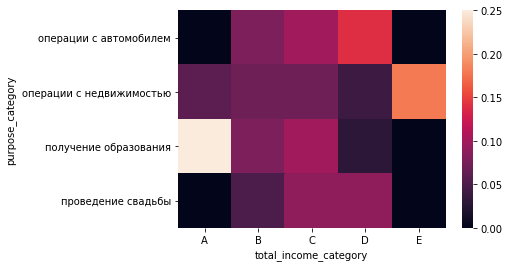

In [19]:

uniform_data1 = (df_pivot_income_category_purpose_sum/df_pivot_income_category_purpose_len).round(2)
ax1 = sns.heatmap(uniform_data1)

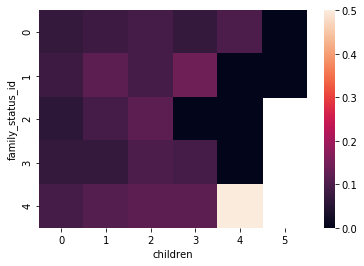

In [20]:
uniform_data = (df_pivot_family_status_children_sum/df_pivot_family_status_children_len).round(2)
ax = sns.heatmap(uniform_data)

### Ответы на вопросы.

##### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?


##### Вывод 1:

Определенно заемщики без детей имеют на 2% меньше случаев наличия задолженности 
Данные по заемщикам с 4 и 5 детьми сложно оценить из-за малого количества. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно! 
</div>

##### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?


##### Вывод 2:

Выделяются 2 категории: те кто были в браке и те кто не были в оффициальном браке. Разница между этими группами в наличии задолженности по кредиту ориентировочно составляет 2%.
Между `Не женат / не замужем` и `вдовец / вдова` составляет 3%.  

##### Вопрос 3:

Влияет ли уровень дохода на факт погашения кредита в срок.


##### Вывод 3:

Разница в наличии задолженности по уровню дохода составила 3%. 



##### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?

##### Вывод 4:


Больше всего процент наличия задолженности в категории `операции с автомобилем`, меньше всего на `операции с недвижимостью`, разница составляет ориентировочно 2% 

##### Вывод 5:

Из сводной таблицы по целям кредита и уровнем дохода видно, что наибольший процент у задолженности у категории `1000001 и выше` на `получение образования` (25%), затем у категории `0–30000` на `операции с  недвижимостью` (18%), далее  в категории `30001–50000` на `операции с автомобилем` (14%). Наименьший процент в категории `0–30000` на `все категории кроме` `операции с  недвижимостью`, в категории `1000001 и выше` на `операции с автомобилем` и `проведение свадьбы`. 



Из сводной таблицы по количеству детей и семейному статусу видно, что наибольший процент у `Не женат / не замужем` с 4 детьми (50%), `гражданский брак`  с 3 детьми (14%) и с 1 ребенком (12%), `Не женат / не замужем` с 2 и 3 детьми (12%), с 1 ребенком 11%,  `вдовец / вдова` с 2 детьми (12%). Наименьшие  показатели (0%) у семей с 5 детьми, а также с 4 детьми (кроме `Не женат / не замужем`) 

## Общий вывод:

Согласно выводам разница по задолженности по отдельным параметрам варьируется до  2% -3 %. 
Однако если рассмотреть сравнения по двум параметрам (семейное положение и количество детей) и (уровень дохода и цели кредита), то разница по задолженности варьируется до 50%. 
Соответственно гипотезы подтвердились отчасти, а для нахождения закономерностей необходимо рассматривать данные по нескольким параметрам